In [1]:
import numpy as np
import pandas as pd
import json
from scipy.signal import find_peaks
from tqdm import tqdm
import anndata as ad

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import src.utilities as utils
from src.slide_utilities import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
adata_all = sc.read_h5ad("data/adata_nichepca_clustered_per_sample_tmp.h5ad")
df_res = pd.read_csv("data/best_resolution.csv", index_col=0)
sample_set = adata_all.obs['sample'].unique()
sample_set

['X40', 'X39', 'X38', 'X37', 'X36', ..., 'X21', 'X20', 'X19', 'X18', 'X17']
Length: 63
Categories (63, object): ['X1', 'X2', 'X3', 'X4', ..., 'X60', 'X61', 'X62', 'X63']

In [3]:
sample = 'X26'
adata = adata_all[adata_all.obs['sample'] == sample]

In [4]:
cols = list(adata.obs.columns)
cols_with_leiden = [c for c in cols if c.find('leiden') > 0]
cols_with_leiden

['per_sample_leiden_res_0.03',
 'per_sample_leiden_res_0.05',
 'per_sample_leiden_res_0.07',
 'per_sample_leiden_res_0.09',
 'per_sample_leiden_res_0.11',
 'per_sample_leiden_res_0.13',
 'per_sample_leiden_res_0.15',
 'per_sample_leiden_res_0.17',
 'per_sample_leiden_res_0.19',
 'per_sample_leiden_res_0.21',
 'per_sample_leiden_res_0.23',
 'per_sample_leiden_res_0.25',
 'per_sample_leiden_res_0.27',
 'per_sample_leiden_res_0.29',
 'per_sample_leiden_res_0.31',
 'per_sample_leiden_res_0.33',
 'per_sample_leiden_res_0.35',
 'per_sample_leiden_res_0.37',
 'per_sample_leiden_res_0.39']

In [5]:
# add cluster markers
# resolution_best = cols_with_leiden[5]
resolution_best = df_res.loc[sample, 'resolution']
resolution_best = f"per_sample_leiden_res_{resolution_best}"

adata = add_markers(adata, 
                    markers = KidneyCellMarkers, 
                    groupby = resolution_best,
                    colormap = colormap,
                    marker_subset = marker_subset, 
                    keyadded = 'final_clusters',
                    verbos=True,
                    return_adata = True
                   )

Cluster number to marker dict:
{'3': {'set': 'Glom.', 'max': 0.27945668, 'diff': 0.231686824679614}, '0': {'set': 'Prox. Tubule', 'max': 0.2602821, 'diff': 0.22681444167393575}, '1': {'set': 'DistaL Con. Tubule', 'max': 0.0969995, 'diff': 0.09477142933514593}}


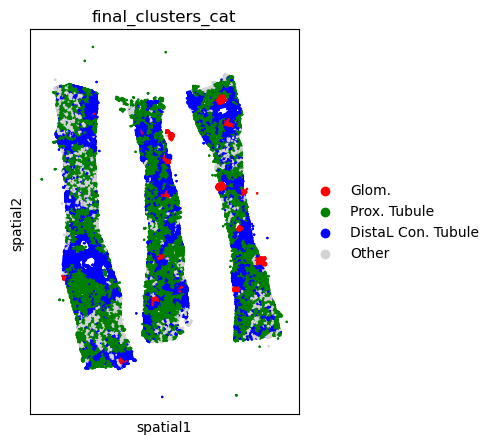

In [6]:
# spatial plot
fig, ax = plt.subplots(figsize=(5, 5))
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color='final_clusters_cat',
    wspace=0.1,
    ax = ax
)

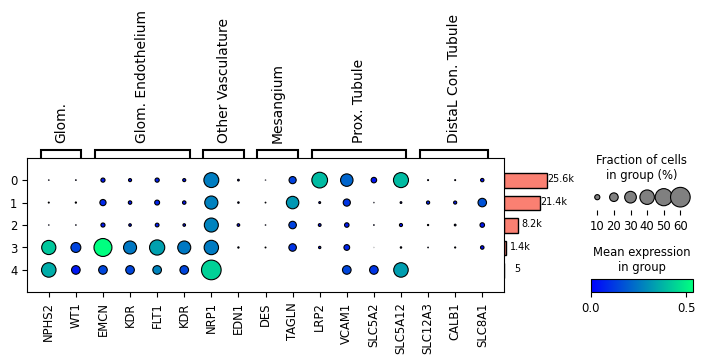

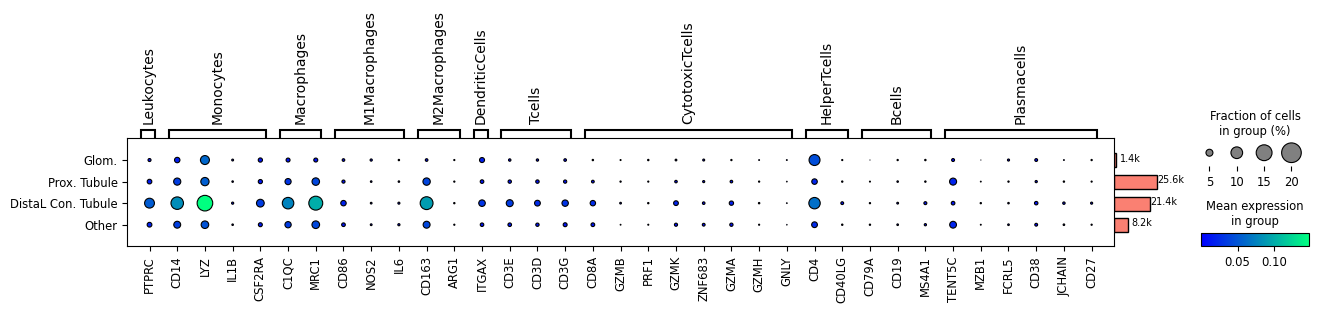

In [7]:
Markers = remove_extra_genes(KidneyCellMarkers, adata)
dp = sc.pl.dotplot(adata, Markers, groupby=resolution_best, use_raw=False, return_fig=True)
dp.style(dot_edge_color='black', dot_edge_lw=.8)
dp.add_totals()
# dp.savefig("marker.pdf")
dp.show()

# Immunological enrichment
Markers = remove_extra_genes(ImmuneMarkers, adata)
dp = sc.pl.dotplot(adata, Markers, groupby='final_clusters_cat', use_raw=False, return_fig=True)
dp.style(dot_edge_color='black', dot_edge_lw=.8)
dp.add_totals()
dp.show()

## Do all in a loop

In [9]:
# adata_all = sc.read_h5ad("data/adata_nichepca_slide_clustered_tmp.h5ad")
# sample_set = adata_all.obs['Patient_Sample_ID'].unique()
# resolution_best = 'per_slide_leiden_0.2_1'

In [2]:
adata_all = sc.read_h5ad("data/adata_nichepca_clustered_per_sample_tmp.h5ad")
adata_all = ad.AnnData(
    X=adata_all.X, 
    obs=adata_all.obs,
    var=adata_all.var,
    uns={'spatial': adata_all.uns['spatial']},
    obsm={'spatial': adata_all.obsm['spatial']}
)
adata_all

AnnData object with n_obs × n_vars = 3222037 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'per_sample_leiden_res_0.03', 'per_sample_leiden_res_0.05', 'per_sample_leiden_res_0.07', 'per_sample_leiden_res_0.09', 'per_sample_leiden_res_0.11', 'per_sample_leiden_res_0.13', 'per_sample_leiden_res_0.15', 'per_sample_leiden_res_0.17', 'per_sample_leiden_res_0.19', 'per_sample_leiden_res_0.21', 'per_sample_leiden_res_0.23', 'per_sample_leiden_res_0.25', 'per_sample_leiden_res_0.27', 'per_sample_leiden_res_0.29', 'per_sample_leiden_res_0.31', 'per_sample_leiden_res_0.33', 'per_sample_leiden_res_0.35', 'per_sample_leiden_res_0.37', 'per_sample_leiden_res_0.39'
    var: 'gene_ids', 'feature_ty

In [3]:
df_res = pd.read_csv("data/best_resolution.csv", index_col=0)
sample_set = adata_all.obs['sample'].unique()
sample_set

['X40', 'X39', 'X38', 'X37', 'X36', ..., 'X21', 'X20', 'X19', 'X18', 'X17']
Length: 63
Categories (63, object): ['X1', 'X2', 'X3', 'X4', ..., 'X60', 'X61', 'X62', 'X63']

In [4]:
adata_all.obs['domains'] = 'na'

for sample in tqdm(sample_set):

    adata = adata_all[adata_all.obs['sample'] == sample]
    
    # add cluster markers
    resolution_best = df_res.loc[sample, 'resolution']
    if resolution_best == 'none':
        continue
    resolution_best = f"per_sample_leiden_res_{resolution_best}"

    adata = add_markers(adata, 
                        markers = KidneyCellMarkers, 
                        groupby = resolution_best,
                        colormap = colormap,
                        marker_subset = marker_subset, 
                        keyadded = 'final_clusters',
                        verbos=False,
                        return_adata = True
                       )
    
    adata_all.obs.loc[adata_all.obs['sample'] == sample ,'domains'] = adata.obs['final_clusters_cat']

100%|██████████| 63/63 [1:02:19<00:00, 59.36s/it] 


In [5]:
adata_all.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,per_sample_leiden_res_0.23,per_sample_leiden_res_0.25,per_sample_leiden_res_0.27,per_sample_leiden_res_0.29,per_sample_leiden_res_0.31,per_sample_leiden_res_0.33,per_sample_leiden_res_0.35,per_sample_leiden_res_0.37,per_sample_leiden_res_0.39,domains
cell_CRfb095a77d-1,2285.790178,1164.057381,32.829188,1,79,2.0240,2.141,39.03,0.9975,0.9916,...,1,2,2,2,2,2,2,2,2,Prox. Tubule
cell_CRfb095a77d-2,2298.342622,1219.741069,31.465535,4,32,1.0850,4.614,29.50,0.9771,0.9288,...,1,2,2,2,2,2,2,2,2,Prox. Tubule
cell_CRfb095a77d-3,2271.434052,1245.859500,32.062796,2,67,3.0590,2.990,21.90,0.9971,0.9884,...,3,4,4,4,4,4,5,4,7,DistaL Con. Tubule
cell_CRfb095a77d-5,2257.346907,1259.955827,31.273945,2,56,2.1420,9.229,26.14,0.9964,0.9707,...,3,4,4,4,4,4,5,4,7,DistaL Con. Tubule
cell_CRfb095a77d-6,2277.712022,1237.595244,35.395148,2,9,1.6980,3.283,5.30,0.9826,0.9400,...,3,4,4,4,4,4,5,4,7,DistaL Con. Tubule
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CRc71d71060-597925,2747.360264,4957.516627,24.097605,2,73,1.5480,3.617,47.15,0.9971,0.6334,...,1,1,1,1,1,1,1,1,1,Other
cell_CRc71d71060-598041,4592.548620,1655.438877,24.254944,2,35,0.9893,1.844,35.38,0.9951,0.6206,...,1,1,1,1,1,1,1,1,1,Other
cell_CRc71d71060-598270,8540.113826,9224.561804,19.515240,3,46,1.3870,2.667,33.16,0.9969,0.7152,...,1,1,1,1,1,1,1,1,1,Other
cell_CRc71d71060-598508,4264.902000,2582.697217,25.121288,3,24,1.1420,5.004,21.02,0.9914,0.7517,...,1,6,6,6,6,6,6,7,7,Other


In [ ]:
adata_all.write("data/adata_nichepca_per_sample_with_domain_2.h5ad")

In [11]:
adata_all = sc.read_h5ad("data/adata_nichepca_per_sample_with_domain_2.h5ad")

In [12]:
adata_all.obs['domains']

cell_CRfb095a77d-1               Prox. Tubule
cell_CRfb095a77d-2               Prox. Tubule
cell_CRfb095a77d-3         DistaL Con. Tubule
cell_CRfb095a77d-5         DistaL Con. Tubule
cell_CRfb095a77d-6         DistaL Con. Tubule
                                  ...        
cell_CRc71d71060-597925                 Other
cell_CRc71d71060-598041                 Other
cell_CRc71d71060-598270                 Other
cell_CRc71d71060-598508                 Other
cell_CRc71d71060-598872                 Other
Name: domains, Length: 3222037, dtype: category
Categories (5, object): ['DistaL Con. Tubule', 'Glom.', 'Other', 'Prox. Tubule', 'na']

In [23]:
adata_all.obs.loc[adata_all.obs['sample'] == sample ,'domains'] = adata.obs['final_clusters_cat']

In [24]:
adata_all.obs.loc[adata_all.obs['sample'] == sample ,'domains']

cell_CR53cd53b06-227888                 Other
cell_CR53cd53b06-228933          Prox. Tubule
cell_CR53cd53b06-229666                 Other
cell_CR53cd53b06-229685                 Other
cell_CR53cd53b06-229765                 Other
                                  ...        
cell_CR53cd53b06-462065                 Glom.
cell_CR53cd53b06-462195                 Other
cell_CR53cd53b06-462241    DistaL Con. Tubule
cell_CR53cd53b06-462541    DistaL Con. Tubule
cell_CR53cd53b06-463018                 Other
Name: domains, Length: 56620, dtype: category
Categories (5, object): ['DistaL Con. Tubule', 'Glom.', 'Other', 'Prox. Tubule', 'na']

In [22]:
adata.obs['final_clusters_cat']

cell_CR53cd53b06-227888                 Other
cell_CR53cd53b06-228933          Prox. Tubule
cell_CR53cd53b06-229666                 Other
cell_CR53cd53b06-229685                 Other
cell_CR53cd53b06-229765                 Other
                                  ...        
cell_CR53cd53b06-462065                 Glom.
cell_CR53cd53b06-462195                 Other
cell_CR53cd53b06-462241    DistaL Con. Tubule
cell_CR53cd53b06-462541    DistaL Con. Tubule
cell_CR53cd53b06-463018                 Other
Name: final_clusters_cat, Length: 56620, dtype: category
Categories (5, object): ['DistaL Con. Tubule', 'Glom.', 'Other', 'Prox. Tubule', 'na']

In [17]:
# If we want to sneak-in some values
# adata_all = sc.read_h5ad("data/adata_nichepca_per_sample_with_domain_2.h5ad")
# adata.obs['final_clusters_cat'] = adata.obs['final_clusters_cat'].cat.set_categories(adata_all.obs['domains'].cat.categories)
# adata.obs['final_clusters_cat'] = adata.obs['final_clusters_cat'].cat.as_unordered()
# adata_all.obs.loc[adata_all.obs['sample'] == sample ,'domains'] = adata.obs['final_clusters_cat']